In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 4

In [ ]:

import qiskit
from qiskit.circuit.parameterexpression import ParameterValueType
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit import pulse, QuantumCircuit, IBMQ, visualization,execute, Aer
from qiskit.pulse import library
from qiskit.visualization.pulse_v2.stylesheet import IQXDebugging
from qiskit.visualization.pulse_v2 import draw
from qiskit.providers.fake_provider import FakeQuito, FakeBelem, FakeSantiago, FakeManila, FakeLagos, FakeLima,FakeJakarta
from qiskit.pulse import transforms
from qiskit.pulse.transforms import block_to_schedule
from qiskit.pulse import filters
from qiskit.pulse.filters import composite_filter, filter_instructions
from typing import List, Tuple, Iterable, Union, Dict, Callable, Set, Optional, Any
from qiskit.pulse.instructions import Instruction
from qiskit.compiler import assemble, schedule

In [ ]:

import qiskit
from qiskit.circuit.library import TwoLocal, RealAmplitudes
from qiskit import pulse, QuantumCircuit,circuit
from qiskit.circuit import Gate
from qiskit.pulse import library, Schedule,GaussianSquare, ControlChannel, Play, Drag,DriveChannel,Delay,DriveChannel, SymbolicPulse, ShiftPhase
from qiskit.pulse import transforms
from qiskit.pulse.transforms import block_to_schedule,remove_directives
from qiskit.pulse import filters
from qiskit.pulse.filters import composite_filter, filter_instructions
from typing import List, Tuple, Iterable, Union, Dict, Callable, Set, Optional, Any
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization.pulse_v2 import draw, IQXSimple,IQXDebugging
from qiskit.compiler import assemble, schedule
from qiskit import IBMQ


In [ ]:
IBMQ.save_account('Your Token', overwrite=True)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers
provider = IBMQ.get_provider(
    hub="Your hub", group="Your group", project="Your project"
)
backend = provider.get_backend('ibmq_guadalupe')

In [ ]:
backend = FakeQuito()

In [ ]:
def generate_parametric_pulse(backend, q1, amp_list, angle_list):
  sched1 = pulse.Play(Drag(duration=160, sigma=40, beta=0.4469017066717889, amp=amp_list, angle=angle_list), DriveChannel(0))
  with pulse.build(backend) as pulse_x:
    with pulse.transpiler_settings(initial_layout= [0]):
      sched = Schedule()
      pulse.call(sched)
  pulse_x.append(sched1)
  with pulse.build(backend) as pulse_y:
    with pulse.transpiler_settings(initial_layout= [0]):
      pulse.call(pulse_x)
  with pulse.build(backend) as pulse_y1:
    with pulse.transpiler_settings(initial_layout= [0]):
      circ = QuantumCircuit(1)
      circ.h(0)
      pulse.call(circ)
  pulse_y.append(pulse_y1)
  with pulse.build(backend) as pulse_y2:
    with pulse.transpiler_settings(initial_layout= [0]):
      pulse.call(pulse_y) 
      pulse.barrier(q1)
      pulse.measure(q1)

  return  block_to_schedule(pulse_y2)

In [ ]:
amp_group = (0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.30,0.32,0.34,0.36,0.38,0.40,0.42)

In [ ]:
import numpy as np

In [ ]:
pulse_x = generate_parametric_pulse(backend,0,0.1,0.1)

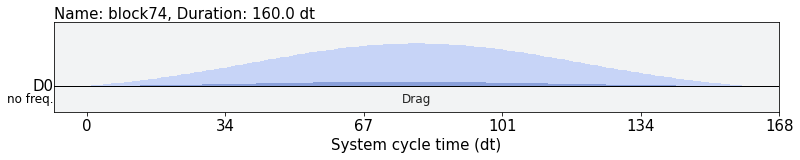

In [ ]:
pulse_x.draw()

In [ ]:
pulse_list = []
for amp in amp_group:
  pulse_x = generate_parametric_pulse(backend,0,amp,0)
  pulse_list.append(pulse_x)
print(pulse_list)

[Schedule((0, Play(Drag(duration=160, sigma=40, beta=0.4469017066717889, amp=0.1, angle=0), DriveChannel(0))), (160, ShiftPhase(-1.5707963268, DriveChannel(0))), (160, ShiftPhase(-1.5707963268, ControlChannel(1))), (160, Play(Drag(duration=160, sigma=40, beta=0.3574624189942019, amp=0.08391870647301973, angle=0.017630540123828586, name='drag_9d65'), DriveChannel(0), name='drag_9d65')), (160, TimeBlockade(160, ControlChannel(1))), (320, RelativeBarrier(DriveChannel(0), MeasureChannel(0), AcquireChannel(0), ControlChannel(0), ControlChannel(1))), (320, ShiftPhase(-1.5707963268, DriveChannel(0))), (320, ShiftPhase(-1.5707963268, ControlChannel(1))), (320, Acquire(22400, AcquireChannel(0), MemorySlot(0))), (320, Play(GaussianSquare(duration=22400, sigma=64, width=22144, amp=0.034, angle=0.5605318066844013, name='gaussian_square_d01b'), MeasureChannel(0), name='gaussian_square_d01b')), (22720, TimeBlockade(1680, AcquireChannel(0))), (22720, Delay(1680, MeasureChannel(0))), name="block234"),

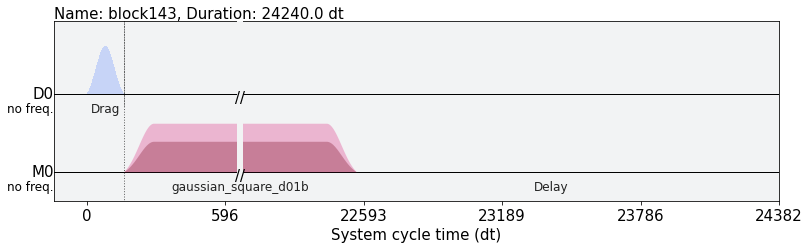

In [ ]:
pulse_x.draw()

In [ ]:
pulse_list = []
for angle in angles:
  pulse_x = generate_parametric_pulse(backend,0,0.08391870647301973,angle)
  pulse_list.append(pulse_x)

In [ ]:
#pulse_sim = qiskit.providers.aer.PulseSimulator.from_backend(FakeJakarta())

In [ ]:
#pulse_simulate = assemble(orig_sched, backend = pulse_sim, shots=2048)
job = execute(pulse_list, backend, shots = 2048)
results = job.result()
counts = results.get_counts()

/usr/local/lib/python3.8/dist-packages/qiskit_aer/pulse/controllers/pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


In [ ]:
print(counts)

[{'0': 468, '1': 1580}, {'0': 195, '1': 1853}, {'0': 15, '1': 2033}, {'0': 38, '1': 2010}, {'0': 203, '1': 1845}, {'0': 602, '1': 1446}, {'0': 978, '1': 1070}, {'0': 1451, '1': 597}, {'0': 1762, '1': 286}, {'0': 2002, '1': 46}, {'0': 2045, '1': 3}, {'0': 1922, '1': 126}, {'0': 1585, '1': 463}, {'0': 1199, '1': 849}, {'0': 819, '1': 1229}, {'0': 401, '1': 1647}, {'0': 117, '1': 1931}]


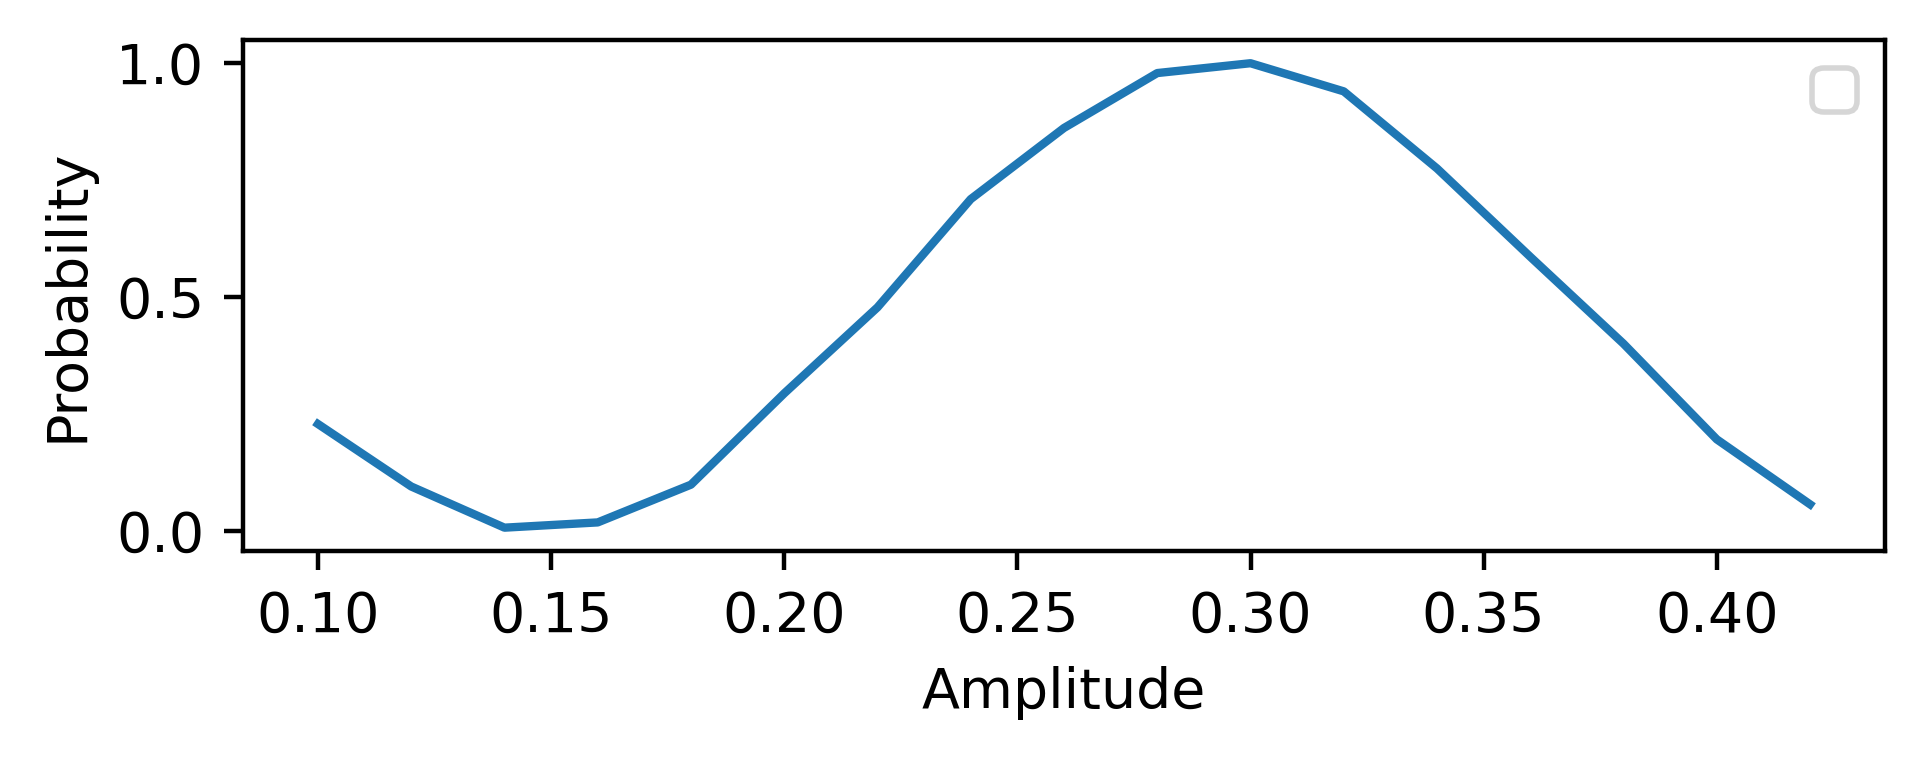

In [ ]:
import matplotlib.pyplot as plt

# Define the x and y data
amplitude = (0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.30,0.32,0.34,0.36,0.38,0.40,0.42)
quantum_state = [{'0': 468, '1': 1580}, {'0': 195, '1': 1853}, {'0': 15, '1': 2033}, {'0': 38, '1': 2010}, {'0': 203, '1': 1845}, {'0': 602, '1': 1446}, {'0': 978, '1': 1070}, {'0': 1451, '1': 597}, {'0': 1762, '1': 286}, {'0': 2002, '1': 46}, {'0': 2045, '1': 3}, {'0': 1922, '1': 126}, {'0': 1585, '1': 463}, {'0': 1199, '1': 849}, {'0': 819, '1': 1229}, {'0': 401, '1': 1647}, {'0': 117, '1': 1931}]




# Extract the number of 0's and 1's for each quantum state
counts = [2048 for _ in quantum_state]
ones = [state['1'] if '1' in state else 0 for state in quantum_state]
ratio = [o/c for o, c in zip(ones, counts)]
zeros_ratio = [1 - r for r in ratio]
# Plot the graph
fig, ax = plt.subplots(figsize=(5,2), dpi = 400)
ax.plot(amplitude, zeros_ratio, linestyle='-')

ax.set_xlabel('Amplitude', fontsize = 10)
ax.set_ylabel('Probability', fontsize = 10)
ax.tick_params(axis='both', labelsize=10)

ax.legend(['Zeros Ratio'], loc='best')

fig.tight_layout()
ax.legend()
plt.show()